In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

from pylab import pcolor, colorbar, plot

In [2]:
df = pd.read_csv('credit_data.csv')
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [3]:
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [5]:
df = df.dropna(axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  1997 non-null   int64  
 1   income    1997 non-null   float64
 2   age       1997 non-null   float64
 3   loan      1997 non-null   float64
 4   default   1997 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 93.6 KB


In [7]:
df.loc[df['age'] < 0, 'age'] = df['age'].mean()

In [8]:
df.describe()

,clientid,income,age,loan,default
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.956935,45333.864334,40.927520,4445.487716,0.141713
std,576.702206,14325.131177,13.261826,3046.792457,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.072097,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3977.287432,0.000000
75%,1501.000000,57787.565659,52.587040,6440.861434,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [9]:
X = df.iloc[:, 0:4].to_numpy()
y = df.iloc[:, 4].to_numpy()

In [10]:
normalizer = MinMaxScaler(feature_range=(0,1))
X = normalizer.fit_transform(X)

In [11]:
som = MiniSom(x=15, y=15, input_len=4, random_seed=0)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

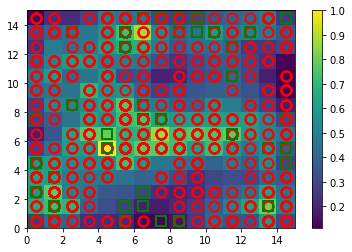

In [12]:
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor='None',
        markersize=10, markeredgecolor=colors[y[i]], markeredgewidth=2)

In [17]:
mapeamento = som.win_map(X)

In [26]:
suspeitos = np.concatenate((mapeamento[(4,5)], mapeamento[(13, 1)]), axis=0)

In [27]:
suspeitos = normalizer.inverse_transform(suspeitos)

In [31]:
classe = []

for i in range(len(df)):
    for j in range(len(suspeitos)):
        if df.iloc[i, 0] == int(round(suspeitos[j, 0])):
            classe.append(df.iloc[i, 4])

classe = np.asarray(classe)
classe

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [35]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final

array([[8.21000000e+02, 6.54819456e+04, 4.50385762e+01, 1.06142485e+04,
        0.00000000e+00],
       [8.35000000e+02, 6.51379378e+04, 4.21331096e+01, 1.03521818e+04,
        0.00000000e+00],
       [8.43000000e+02, 6.00050101e+04, 4.01948890e+01, 1.06776680e+04,
        0.00000000e+00],
       [8.75000000e+02, 6.62742081e+04, 3.63746234e+01, 1.02579184e+04,
        0.00000000e+00],
       [9.46000000e+02, 6.35588641e+04, 3.63568547e+01, 9.28292774e+03,
        0.00000000e+00],
       [9.68000000e+02, 6.52108371e+04, 2.75284397e+01, 1.26079517e+04,
        1.00000000e+00],
       [1.04200000e+03, 5.92565560e+04, 3.85789446e+01, 9.81297872e+03,
        0.00000000e+00],
       [1.08400000e+03, 6.27246361e+04, 3.98353766e+01, 9.25513776e+03,
        0.00000000e+00],
       [1.08900000e+03, 6.45019304e+04, 3.33579469e+01, 1.21473142e+04,
        1.00000000e+00],
       [1.09500000e+03, 6.25356328e+04, 3.91940755e+01, 9.49026419e+03,
        0.00000000e+00],
       [1.10300000e+03, 6.3944

In [37]:
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]
suspeitos_final

array([[8.21000000e+02, 6.54819456e+04, 4.50385762e+01, 1.06142485e+04,
        0.00000000e+00],
       [8.35000000e+02, 6.51379378e+04, 4.21331096e+01, 1.03521818e+04,
        0.00000000e+00],
       [8.43000000e+02, 6.00050101e+04, 4.01948890e+01, 1.06776680e+04,
        0.00000000e+00],
       [8.75000000e+02, 6.62742081e+04, 3.63746234e+01, 1.02579184e+04,
        0.00000000e+00],
       [9.46000000e+02, 6.35588641e+04, 3.63568547e+01, 9.28292774e+03,
        0.00000000e+00],
       [1.04200000e+03, 5.92565560e+04, 3.85789446e+01, 9.81297872e+03,
        0.00000000e+00],
       [1.08400000e+03, 6.27246361e+04, 3.98353766e+01, 9.25513776e+03,
        0.00000000e+00],
       [1.09500000e+03, 6.25356328e+04, 3.91940755e+01, 9.49026419e+03,
        0.00000000e+00],
       [1.44400000e+03, 6.34532231e+04, 2.39157054e+01, 1.06683635e+04,
        0.00000000e+00],
       [1.21300000e+03, 6.82911536e+04, 4.67935381e+01, 9.57795514e+03,
        0.00000000e+00],
       [1.39700000e+03, 6.3271